# Лабораторная работа 4. Алгоритмы на графах

## Вариант 11 

### Задание 1-2: Найти кратчайший путь на графе между парами вершин методом динамического программирования и динамического программирования вручную между 4 и 7 вершинами.

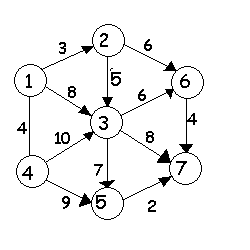

In [32]:
from IPython.display import Image
Image(filename='Desktop/001.png')

### Входные данные графа

In [33]:
1, 2, 3, 4, 5, 6, 7 = range(7)
N = {
    1: {2: 3, 3: 8, 4: 4},
    2: {3: 5, 6: 6},
    3: {5: 7, 6: 6, 7: 8},
    4: {3: 10, 5: 9},
    5: {7: 2},
    6: {7: 4},
    7: {}
}

SyntaxError: cannot assign to literal (2943409036.py, line 1)

### Задание 3-4: Реализовать алгоритм Дейкстры поиска кратчайшего пути на графе и реализовать прогрммно один из алгоритмов поиска кратчайшего пути на графе между 3 и 7 вершинами.

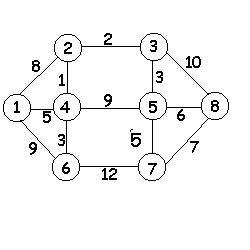

In [34]:
from IPython.display import Image
Image(filename='Desktop/011.png')

### Входные данные графа

In [35]:
1, 2, 3, 4, 5, 6, 7 = range(7)
N = {
    1: {2: 8, 4: 5, 6: 9},
    2: {1: 8, 3: 2, 4: 1},
    3: {2: 2, 5: 3, 8: 10},
    4: {1: 5, 2: 1, 5: 9, 6: 3},
    5: {3: 3, 4: 9, 7: 5, 8: 6},
    6: {1: 9, 4: 3, 7: 12},
    7: {5: 5, 6: 12, 8: 7},
    8: {3: 10, 5: 6, 7: 7}
}

SyntaxError: cannot assign to literal (2613637756.py, line 1)

# Реализация  

### Задание 1

Начальные условия $f_1=0$, $S_{11} = 0$.

Находим последовательно значения функции $f_i$ (в условных единицах) для каждой вершины ориентированного графа:

$f_5 = \min(S_{54} + f_4) = 9 + f_4 = 9 + 0 = 9$;

$f_3 = \min(S_{34} + f_4) = 10 + f_4 = 10 + 0 = 10$;

$f_6 = \min(S_{63} + f_3) = 6 + f_3 = 6 + 10 = 16$;

$f_7 = \min 
\left(
  \begin{array}{c}
  S_{73} + f_3 \\
  S_{75} + f_5 \\
  S_{76} + f_6 \\
  \end{array}
\right) 
= 
\min 
\left(
  \begin{array}{c}
  8 + 10 \\
  2 + 9 \\
  4 + 16 \\
  \end{array}
\right) = 11$; 


Длина кратчайшего пути составляет 11 условных единиц. Остальные вершины можно не учитывать, тк из начальной вершины 4 в них никак не попасть. 

Для выбора оптимальной траектории движения следует осуществить просмотр функций $f_i$ в обратном порядке, то есть с $f_{7}$. 

Пусть $f_i = f_{7}$. 

В данном случае

$f_{7} = \min 
\left(
  \begin{array}{c}
  8 + f_3 \\
  2 + f_5 \\
  4 + f_6 \\
  \end{array}
\right)
= 
\min 
\left(
  \begin{array}{c}
  8 + 10 \\
  2 + 9 \\
  4 + 16 \\
  \end{array}
\right) = 11$; 

Получаем, что $2 + f_5 = 11$, то есть $f_j = f_5$. 
Значит, из вершины 7 следует перейти к вершине 5.

Имеем $f_i = f_5$.   

Рассмотрим функцию 
$f_5 = \min 
\left(
  \begin{array}{c}
  7 + f_3 \\
  6 + f_4 \\
  \end{array}
\right)
= 
\min 
\left(
  \begin{array}{c}
  7 + 10 \\
  0 + 9 \\
  \end{array}
\right) = 9,$

т.е. $f_j = f_4$

Таким образом, получаем кратчайший путь от вершины 4 к вершине 7: (4,  5,  7) 

### Задание 2

In [36]:
def Dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    path = {start: []}
    visited = []
    while end not in visited:
        min_node = None
        for node in graph:
            if node not in visited:
                if min_node is None:
                    min_node = node
                elif distances[node] < distances[min_node]:
                    min_node = node
                    
        for neighbor, cost in graph[min_node].items():
            if neighbor not in visited:
                new_cost = distances[min_node] + cost
                if new_cost < distances[neighbor]:
                    distances[neighbor] = new_cost
                    path[neighbor] = path[min_node] + [min_node]
        visited.append(min_node)

    return path[end] + [end], distances[end]

N = {
    1: {2: 3, 3: 8, 4: 4},
    2: {3: 5, 6: 6},
    3: {5: 7, 6: 6, 7: 8},
    4: {3: 10, 5: 9},
    5: {7: 2},
    6: {7: 4},
    7: {}
}

path, distance = Dijkstra(N, 4, 7)
print(distance, path)

11 [4, 5, 7]


### Задание 3

In [37]:
def Dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    path = {start: []}
    visited = []
    while end not in visited:
        min_node = None
        for node in graph:
            if node not in visited:
                if min_node is None:
                    min_node = node
                elif distances[node] < distances[min_node]:
                    min_node = node
        if min_node is None:
            break
        for neighbor, cost in graph[min_node].items():
            if neighbor not in visited:
                new_cost = distances[min_node] + cost
                if new_cost < distances[neighbor]:
                    distances[neighbor] = new_cost
                    path[neighbor] = path[min_node] + [min_node]
        visited.append(min_node)

    return path[end] + [end], distances[end]

N = {
    1: {2: 8, 4: 5, 6: 9},
    2: {1: 8, 3: 2, 4: 1},
    3: {2: 2, 5: 3, 8: 10},
    4: {1: 5, 2: 1, 5: 9, 6: 3},
    5: {3: 3, 4: 9, 7: 5, 8: 6},
    6: {1: 9, 4: 3, 7: 12},
    7: {5: 5, 6: 12, 8: 7},
    8: {3: 10, 5: 6, 7: 7}
}

path, distance = Dijkstra(N, 3, 7)
print(distance, path)

8 [3, 5, 7]


### Задание 4

In [38]:
def BellmanFord(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    prev = {node: None for node in graph}

    for i in range(len(graph) - 1):
        for node in graph:
            for neighbor, coast in graph[node].items():
                if distances[node] + coast < distances[neighbor]:
                    distances[neighbor] = distances[node] + coast
                    prev[neighbor] = node

    path = []
    node = end
    while node is not None:
        path.append(node)
        node = prev[node]
    path.reverse()

    return path, distances[end]

N = {
    1: {2: 8, 4: 5, 6: 9},
    2: {1: 8, 3: 2, 4: 1},
    3: {2: 2, 5: 3, 8: 10},
    4: {1: 5, 2: 1, 5: 9, 6: 3},
    5: {3: 3, 4: 9, 7: 5, 8: 6},
    6: {1: 9, 4: 3, 7: 12},
    7: {5: 5, 6: 12, 8: 7},
    8: {3: 10, 5: 6, 7: 7}
}

start = 3
end = 7

path, distances = BellmanFord(N, start, end)
print(distances, path)

8 [3, 5, 7]
